In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.527359,0.582893,-2.675279e-07,0.520158,0.715900,-0.071328,0.478445,0.831054,-0.115866,0.435289,...,0.242902,0.552400,-0.027958,0.262250,0.598118,-0.016932,0.292065,0.607063,-0.007875,Dislike
1,0.527784,0.573282,-2.591946e-07,0.521993,0.698918,-0.053350,0.475477,0.820611,-0.092294,0.435327,...,0.252270,0.537227,-0.050208,0.269400,0.581407,-0.039717,0.298921,0.592347,-0.031608,Dislike
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Dislike
3,0.531613,0.470424,-3.637794e-07,0.524946,0.591713,-0.045644,0.476768,0.690985,-0.079836,0.436101,...,0.266596,0.425162,-0.052295,0.290304,0.461854,-0.039638,0.322720,0.460443,-0.028976,Dislike
4,0.541222,0.447640,-2.714850e-07,0.527592,0.568223,-0.061672,0.485826,0.660484,-0.104035,0.445022,...,0.267666,0.395149,-0.050358,0.277559,0.430889,-0.041456,0.304706,0.435674,-0.033696,Dislike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.414022,0.936556,5.977296e-07,0.459911,0.784540,-0.029776,0.456224,0.629096,-0.034190,0.445741,...,0.158755,0.706607,-0.027690,0.187252,0.695359,-0.038168,0.230536,0.726614,-0.041005,zoom out
695,0.525161,0.949022,4.496042e-07,0.549114,0.814634,-0.031775,0.536976,0.656695,-0.047407,0.532066,...,0.234362,0.752582,-0.057884,0.271580,0.751202,-0.057383,0.313180,0.772488,-0.050246,zoom out
696,0.604327,0.944846,5.357786e-07,0.628677,0.818420,-0.034218,0.615946,0.660491,-0.053528,0.611318,...,0.328428,0.754810,-0.108432,0.375572,0.743854,-0.113550,0.420757,0.769231,-0.108792,zoom out
697,0.663900,0.926897,5.683272e-07,0.681827,0.786790,-0.015045,0.646089,0.642734,-0.034571,0.645380,...,0.392070,0.760670,-0.154863,0.447790,0.736593,-0.155182,0.490143,0.775486,-0.146875,zoom out


In [4]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.527359,0.582893,-2.675279e-07,0.520158,0.715900,-0.071328,0.478445,0.831054,-0.115866,0.435289,...,0.242902,0.552400,-0.027958,0.262250,0.598118,-0.016932,0.292065,0.607063,-0.007875,Dislike
1,0.527784,0.573282,-2.591946e-07,0.521993,0.698918,-0.053350,0.475477,0.820611,-0.092294,0.435327,...,0.252270,0.537227,-0.050208,0.269400,0.581407,-0.039717,0.298921,0.592347,-0.031608,Dislike
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Dislike
3,0.531613,0.470424,-3.637794e-07,0.524946,0.591713,-0.045644,0.476768,0.690985,-0.079836,0.436101,...,0.266596,0.425162,-0.052295,0.290304,0.461854,-0.039638,0.322720,0.460443,-0.028976,Dislike
4,0.541222,0.447640,-2.714850e-07,0.527592,0.568223,-0.061672,0.485826,0.660484,-0.104035,0.445022,...,0.267666,0.395149,-0.050358,0.277559,0.430889,-0.041456,0.304706,0.435674,-0.033696,Dislike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.414022,0.936556,5.977296e-07,0.459911,0.784540,-0.029776,0.456224,0.629096,-0.034190,0.445741,...,0.158755,0.706607,-0.027690,0.187252,0.695359,-0.038168,0.230536,0.726614,-0.041005,zoom out
695,0.525161,0.949022,4.496042e-07,0.549114,0.814634,-0.031775,0.536976,0.656695,-0.047407,0.532066,...,0.234362,0.752582,-0.057884,0.271580,0.751202,-0.057383,0.313180,0.772488,-0.050246,zoom out
696,0.604327,0.944846,5.357786e-07,0.628677,0.818420,-0.034218,0.615946,0.660491,-0.053528,0.611318,...,0.328428,0.754810,-0.108432,0.375572,0.743854,-0.113550,0.420757,0.769231,-0.108792,zoom out
697,0.663900,0.926897,5.683272e-07,0.681827,0.786790,-0.015045,0.646089,0.642734,-0.034571,0.645380,...,0.392070,0.760670,-0.154863,0.447790,0.736593,-0.155182,0.490143,0.775486,-0.146875,zoom out


In [5]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (699, 63)
Labels shape = (699,)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [8]:
y_pred = svm.predict(x_test)
y_pred

array(['swipeR', 'zoom in', 'EXITs', 'swipeR', 'Dislike', 'EXITs', 'Like',
       'EXITs', 'EXITs', 'EXITs', 'zoom out', 'zoom out', 'Like',
       'swipeL', 'Dislike', 'swipeL', 'zoom out', 'swipeR', 'zoom out',
       'zoom in', 'swipeR', 'zoom out', 'EXITs', 'zoom out', 'zoom in',
       'swipeL', 'swipeL', 'zoom in', 'zoom out', 'Dislike', 'swipeL',
       'zoom in', 'swipeR', 'Dislike', 'EXITs', 'zoom out', 'swipeR',
       'Like', 'swipeL', 'swipeL', 'swipeL', 'EXITs', 'swipeR', 'EXITs',
       'EXITs', 'Like', 'zoom out', 'zoom in', 'swipeR', 'zoom in',
       'swipeL', 'swipeR', 'swipeL', 'Like', 'Like', 'swipeR', 'swipeR',
       'zoom in', 'EXITs', 'Dislike', 'swipeL', 'EXITs', 'EXITs',
       'swipeR', 'Dislike', 'zoom in', 'Like', 'swipeR', 'swipeR',
       'zoom out', 'zoom out', 'Dislike', 'Dislike', 'swipeR', 'zoom out',
       'Like', 'swipeR', 'zoom in', 'Like', 'Like', 'zoom out', 'Like',
       'swipeL', 'swipeR', 'zoom out', 'zoom out', 'EXITs', 'zoom out',
       '

In [9]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9071428571428571, 0.9071428571428571, 0.9071428571428571)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

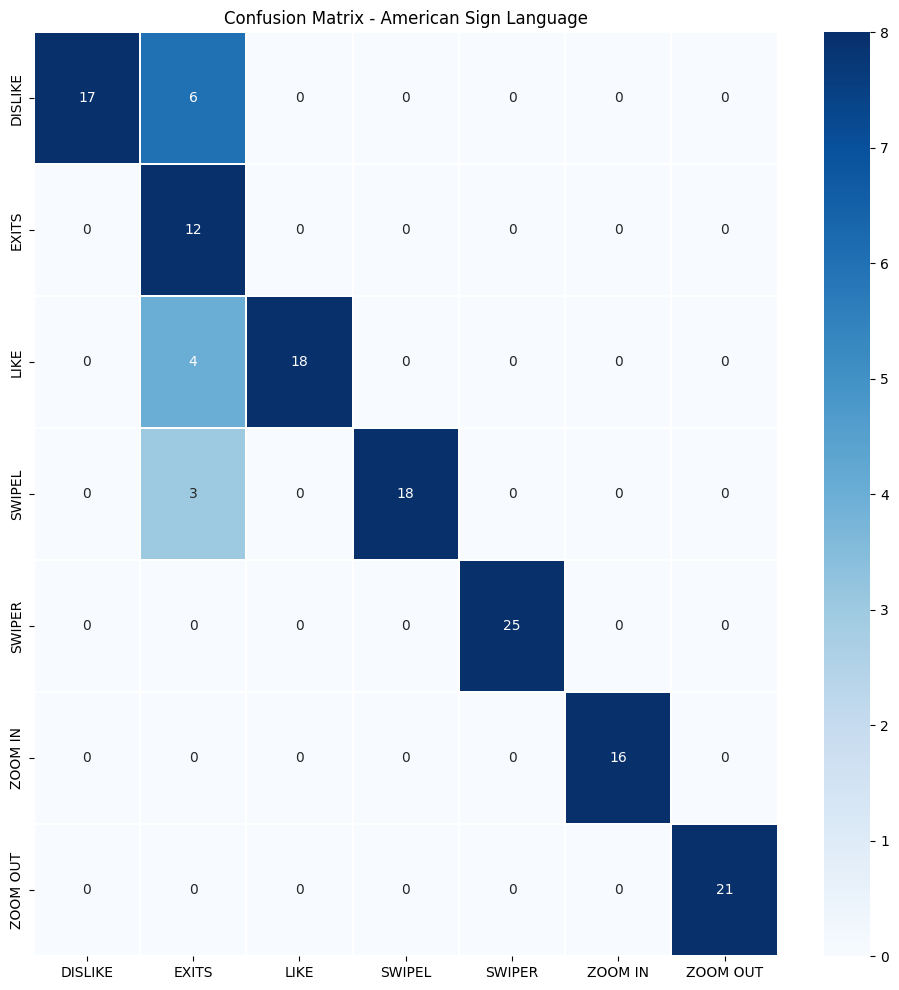

In [10]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Custom signs")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping